In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")


In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics

from sklearn import preprocessing


<h1>Basic Regression Algorithms</h1>

Here we review seven of the most well-known regression algorithms. 

Four variations of linear regression:

<ul>
    <li>Logistic Regression.</li>
    <li>Ridge Linear Regression.</li>
    <li>Lasso Linear Regression.</li>
    <li>Elastic Net Regression.</li>
</ul>
and three non-linear that we already know as classification algorithms:
<ul>
    <li>k-nn - k-Nearest Neighbors.</li>
    <li>CART - Classification and Regression Trees.</li>
    <li>SVM - Support Vector Machines.</li>
</ul>

Again we will compare the result and plot it, trying to address the question of which algorithm works better with this dataset. 

For the dataset, we will use a well-known one that we previously used: the Boston Housing Price with a 10-fold cross-validation. Obviously in this case the objective is to approximate the pricing. 

As a metric we will use the mean squarred error. Please note that scikit-learn follows a convention that imposes all metrics to be sorted in ascending order, therefore the larger is always better. In order to follow this convention, mean squarred error is expressed with a negative sign, so larger is better (in this case 0). 



<img src="boston.jpg">
<img src="Boston-Dataset-char.png">


In [22]:
# Load the Boston dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="HousingData.csv"
b_housing=pd.read_csv(filename)
b_housing.head()

b_housing.fillna(0,inplace=True) # we have NaN

# First we separate into input and output components
array=b_housing.values
X=array[:,0:13]
y=array[:,13]
np.set_printoptions(suppress=True)
X
pd.DataFrame(X).head()

# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


array([[  0.006,  18.   ,   2.31 , ...,  15.3  , 396.9  ,   4.98 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 396.9  ,   9.14 ],
       [  0.027,   0.   ,   7.07 , ...,  17.8  , 392.83 ,   4.03 ],
       ...,
       [  0.061,   0.   ,  11.93 , ...,  21.   , 396.9  ,   5.64 ],
       [  0.11 ,   0.   ,  11.93 , ...,  21.   , 393.45 ,   6.48 ],
       [  0.047,   0.   ,  11.93 , ...,  21.   , 396.9  ,   7.88 ]])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,0.00


# Linear Regression

You all are probably familiar with linear regression! 

Just a small reminder, it assumes a Gaussian distribution and that all variables are relevant. It also assumes that variables are not highly correlated (a problem called collinearity).

We will discuss both the statistical approach to Linear Regression and the Machine Learning approach. You will see that in the statistical approach we seek to fit a model to an existing set of data with the objective to find the components that explain this fit. In contrast, in machine learning we aim to build a model that is able to work well and predict with unknown sets of data. 

We will use the <b>LinearRegression</b> class.

In [23]:
# Linear Regression as used in statistics and social science
#  we use statsmodel

import statsmodels.api as sm

X_pd=b_housing.copy()
X_pd=X_pd.drop(["MEDV"],axis=1)
y_pd=b_housing["MEDV"]

X_pd=sm.add_constant(X_pd) # scikit learn ya te pone la cte, pero no es así en statsmodel no, por lo que se lo indicas.
# "quiero que me añadas cte al dataframe"
model = sm.OLS(y_pd,X_pd).fit()

model.summary()

# Hacer un fit es mirar todos esos valores, y todo eso que has conseguido, enséñamelo (.summary)

/Users/alfred/Documents/anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     100.7
Date:                Fri, 03 Jan 2020   Prob (F-statistic):          2.06e-129
Time:                        19:31:08   Log-Likelihood:                -1511.9
No. Observations:                 506   AIC:                             3052.
Df Residuals:                     492   BIC:                             3111.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2336      5.204      6.387      0.000      23.009      43.458
CRIM          -0.1162      0.033     -3.547      0.000      -0.181      -0.052
ZN             0.0429      0.014      3.136      0.002       0.016       0.070
INDUS         -0.0315      0.052     -0.601      0.548      -0.134       0.071
CHAS           3.1311      0.892      3.510      0.000       1.378       4.884
NOX          -17.3454      3.727     -4.654      0.000     -24.669     -10.022
RM             4.3036      0.412     10.458      0.000       3.495       5.112
AGE           -0.0151      0.010     -1.494      0.136      -0.035       0.005
DIS           -1.4844      0.196     -7.592      0.000      -1.868      -1.100
RAD            0.2685      0.067      3.998      0.000       0.137       0.400
TAX           -0.0109      0.004     -2.874      0.004      -0.018      -0.003
PTRATIO       -0.9815      0.134     -7.348      0.000      -1.244      -0.719
B              0.0094      0.003      3.373      0.001       0.004       0.015
LSTAT         -0.3918      0.044     -8.817      0.000      -0.479      -0.304
==============================================================================
Omnibus:                      188.045   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1006.627
Skew:                           1.541   Prob(JB):                    2.59e-219
Kurtosis:                       9.184   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Linear Regression with scikit-learn

from sklearn.linear_model import LinearRegression

kfold=KFold(n_splits=10, random_state=7)

model=LinearRegression()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Linear Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Lin"

resall=pd.concat([resall,res_w1], ignore_index=True)

# Now lets use it in the same way than the statsmodel

model_x=LinearRegression()
model_x.fit(X,y)
print(f'Intercept {model_x.intercept_:.4f}')
print("Coefficients ",model_x.coef_)

y_pred_x=model_x.predict(X)

print(f'MAE - Mean Absolute Error {metrics.mean_absolute_error(y, y_pred_x):.3f}')
print(f'MSE - Mean Square Error  {metrics.mean_squared_error(y, y_pred_x):.3f}')
print(f'R2    {metrics.r2_score(y, y_pred_x):.3f}')

Linear Regression - MSE -34.090 std 44.046


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Intercept 33.2336
Coefficients  [ -0.116   0.043  -0.032   3.131 -17.345   4.304  -0.015  -1.484   0.269
  -0.011  -0.981   0.009  -0.392]
MAE - Mean Absolute Error 3.308
MSE - Mean Square Error  23.058
R2    0.727


# Ridge Regression

The Ridge regession corresponds to modern linear regression algorithms that aim to be more robust to outliers. 

In this case the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficietn values (also called the L2-norm). 

We will use the <b>Ridge</b> class.


In [25]:
# Ridge Regression 

from sklearn.linear_model import Ridge

kfold=KFold(n_splits=10, random_state=7)

model=Ridge() #alpha=0.1 es por defecto, es el primer argumento
scoring = "neg_mean_squared_error" # minimizar residuos al cuadrado

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Ridge Regression - MSE {results.mean():.3f} std {results.std():.3f}')

# creo variables para luego poder meterlas en el df vacío
res_w1["Res"]=results
res_w1["Type"]="Ridge"

resall=pd.concat([resall,res_w1], ignore_index=True) #no quiero concatenar index
# concatenate es para incluir nuevas filas.


#una opción para mirar alfas es:
#l=[]
# for i in range(0,10,0.01) # en saltos de 0.1
    #ridge(alpha=i)
    #l.append=[results, i] --metric.meansquarederror en regresión lineal.

Ridge Regression - MSE -33.384 std 44.258


# Lasso Regression

Again is a modern regression algorithm that aims a reducing the weight of outliers. 

In this case the loss function is modified measuring the complexity of the model as the sum absolute value of the coefficients values (also called the L1-norm).

You can construct a Lasso model using the <b>Lasso</b> class.

In [26]:
# Lasso Regression 

from sklearn.linear_model import Lasso

kfold=KFold(n_splits=10, random_state=7)

model=Lasso()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Lasso Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Lasso"

resall=pd.concat([resall,res_w1], ignore_index=True)

Lasso Regression - MSE -35.161 std 32.383


# ElasticNet Regression

The ElasticNet Regression combines both the Ridge and the Lasso. 

It penalizes the model using both the L1-norm and the L2-norm. 

You can construct an ElasticNet model using the <b>ElasticNet</b> class.

In [27]:
# ElasticNet Regression 

from sklearn.linear_model import ElasticNet

kfold=KFold(n_splits=10, random_state=7)

model=ElasticNet()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'ElasticNet Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="ElasticNet"

resall=pd.concat([resall,res_w1], ignore_index=True)

ElasticNet Regression - MSE -33.109 std 26.963


# k-nn k-Nearest Neighbors

k-Nearerst Neighbors is a non-linear machine learning algorithm that uses distance metrics to find the most similar k-elements, taking the mean or median outcome of the neighbors as the prediction.

One interesting advantage of this algorithm is that we can choose a different metric for calculating the distance. The default metric is Minkowski, equivalent to euclidean (with p=2). It can be easily transformed to Mnahattan distance with p=1. 

For constructing a knn model for regression you must use the <b>KNeighorsRegressor</b> class.

In [28]:
# KNN Regression 

from sklearn.neighbors import KNeighborsRegressor

kfold=KFold(n_splits=10, random_state=7)

model=KNeighborsRegressor()
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'KNN Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="KNN"

resall=pd.concat([resall,res_w1], ignore_index=True)

KNN Regression - MSE -97.175 std 50.572


# CART - Classification and Regression Trees

Cart builds a binary tree from the data where the splits are chosen greedly evaluating all the attributes in order to minimize a cost function. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter.

For CART we will use the <b>DecisionTreeRegressor</b> class.


In [29]:
# Decision Trees Regression

# Please observe that in this case repeating the algorithm gives different results
# scaling doesn't matter in this case - you get different results but inside the range 

from sklearn.tree import DecisionTreeRegressor

kfold=KFold(n_splits=10, random_state=7)

model=DecisionTreeRegressor() # regresión lineal hecha con decision tree. para clasificar es DecisionTreeClassifier
scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'Decision Trees Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="Trees"

resall=pd.concat([resall,res_w1], ignore_index=True)

Decision Trees Regression - MSE -36.471 std 25.815


# Support Vector Machines

Support vector machines seeks a line that separates best two classes. The data instances that are closest to this line are, better separating the classes, are called support vectors. 

Support Vector Machines have the advantage that you can change the kernel function to use. Radial basis function is used by default, a pretty powerful one. 

You can construct a SVM model for regression with the <b>SVR</b> class.

In [30]:
# SVM - Support Vector Machines

from sklearn.svm import SVR

kfold=KFold(n_splits=10, random_state=7)

model=SVR(gamma="auto")

scoring = "neg_mean_squared_error"

results=cross_val_score(model, X, y, cv=kfold, scoring=scoring)

print(f'SVM Regression - MSE {results.mean():.3f} std {results.std():.3f}')

res_w1["Res"]=results
res_w1["Type"]="SVM"

resall=pd.concat([resall,res_w1], ignore_index=True)


SVM Regression - MSE -91.129 std 71.147


# Algorithm Comparison

<Figure size 1080x648 with 0 Axes>

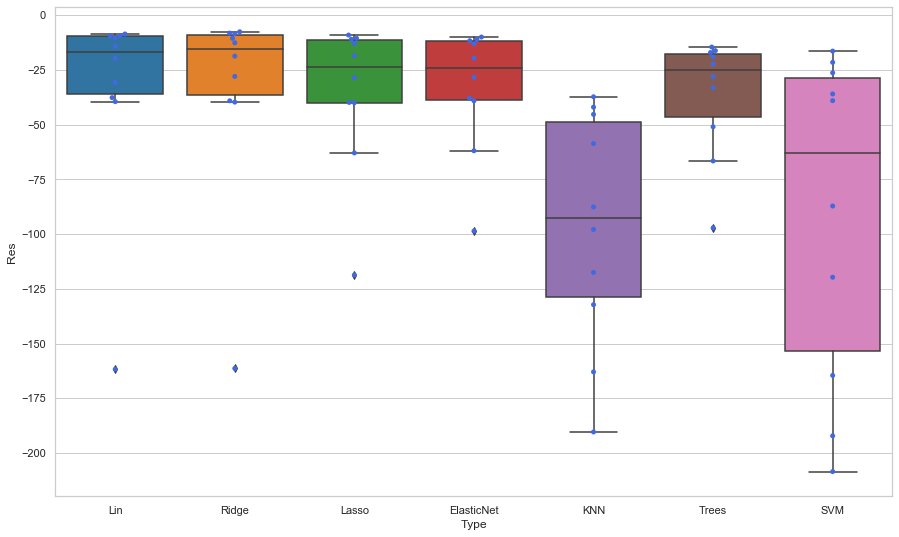

In [31]:
# Now let's compare them all 

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")

<b><font color="red" size=6>Mission 1</font>

a) Let's predict movie revenue using the Movie Database in Kaggle https://www.kaggle.com/c/tmdb-box-office-prediction
<br><br>
</b>

In [32]:
import pandas as pd
train= pd.read_csv('train_movies.csv')
train.columns


Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

(3000, 23)

(4398, 22)

<bound method NDFrame.head of         id                              belongs_to_collection    budget  \
0        1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1        2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2        3                                                NaN   3300000   
3        4                                                NaN   1200000   
4        5                                                NaN         0   
...    ...                                                ...       ...   
2995  2996                                                NaN         0   
2996  2997                                                NaN         0   
2997  2998                                                NaN  65000000   
2998  2999                                                NaN  42000000   
2999  3000                                                NaN  35000000   

                                                 genres  \
0         

Text(0.5, 1.0, 'Distribution of NA')

/Users/alfred/Documents/anaconda/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


,budget,genres,popularity,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,3923970


,budget,genres,popularity,revenue
0,14000000,[Comedy],6.575393,12314651
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,95149435
2,3300000,[Drama],64.299990,13092000
3,1200000,"[Thriller, Drama]",3.174936,16000000
4,0,"[Action, Thriller]",1.148070,3923970


,budget,popularity,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000,6.575393,12314651,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,8.248895,95149435,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3300000,64.299990,13092000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1200000,3.174936,16000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1.148070,3923970,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
budget             3000 non-null int64
popularity         3000 non-null float64
revenue            3000 non-null int64
Action             3000 non-null int64
Adventure          3000 non-null int64
Animation          3000 non-null int64
Comedy             3000 non-null int64
Crime              3000 non-null int64
Documentary        3000 non-null int64
Drama              3000 non-null int64
Family             3000 non-null int64
Fantasy            3000 non-null int64
Foreign            3000 non-null int64
History            3000 non-null int64
Horror             3000 non-null int64
Music              3000 non-null int64
Mystery            3000 non-null int64
Romance            3000 non-null int64
Science Fiction    3000 non-null int64
TV Movie           3000 non-null int64
Thriller           3000 non-null int64
War                3000 non-null int64
Western            3000 non-null 

,budget,popularity,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000,6.575393,12314651,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,8.248895,95149435,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,3300000,64.299990,13092000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1200000,3.174936,16000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1.148070,3923970,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
budget             3000 non-null int64
popularity         3000 non-null float64
revenue            3000 non-null int64
Action             3000 non-null int64
Adventure          3000 non-null int64
Animation          3000 non-null int64
Comedy             3000 non-null int64
Crime              3000 non-null int64
Documentary        3000 non-null int64
Drama              3000 non-null int64
Family             3000 non-null int64
Fantasy            3000 non-null int64
Foreign            3000 non-null int64
History            3000 non-null int64
Horror             3000 non-null int64
Music              3000 non-null int64
Mystery            3000 non-null int64
Romance            3000 non-null int64
Science Fiction    3000 non-null int64
TV Movie           3000 non-null int64
Thriller           3000 non-null int64
War                3000 non-null int64
Western            3000 non-null 

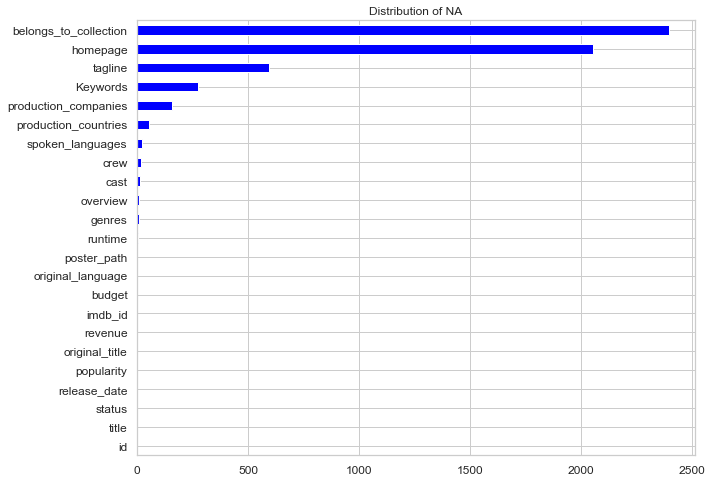

In [33]:
# A) Let's predict movie revenue using the Movie Database in Kaggle https://www.kaggle.com/c/tmdb-box-office-prediction
# According to Kaggle: You are predicting the worldwide revenue for 4398 movies in the test file.
# I checked the solutions/notebooks proposed by the community and they are quite complex...
# ... I have chosen to simplify it, but take some useful tools such as the word cloud.

# IMPORTS
    # No need for the packages and libraries to be imported, since they have all already been imported above (e.g. Pandas, etc)

# IMPORT DATA SETS (in this case I have the train and the test sets divided, as Kaggle does, instead of one)
#train.head()
#test.head()
train= pd.read_csv('train_movies.csv')
test= pd.read_csv('test_movies.csv') # I will not use it, because I will do the test on the revenue in the train...
# ... the 'test' does not provide the revenue, is just for Kaggle to check and grade the solution.
# ...this can be seen with  .shape, since the train data set has one more column (the revenue)
     # 1) Visualize and understand data set, in order to drop no needed columns.
#train.head()
#test.head()
train.shape
test.shape
train.head
# Cool graph to easily visualize null values by column
fig = plt.figure(figsize=(10, 8))
plt.title("Distribution of NA")
train.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='Blue', fontsize=12)

    # Transform columns in something I can use (here I used ideas from the Kaggle notebooks available online...
    #... especially the 'enumerate' function). I will go column by column:
    # Drop columns
train.drop('id', axis=1, inplace=True)
train.drop('belongs_to_collection', axis=1, inplace=True)
train.drop('homepage', axis=1, inplace=True)
train.drop('imdb_id', axis=1, inplace=True)
train.drop('original_language', axis=1, inplace=True)
train.drop('original_title', axis=1, inplace=True)
train.drop('overview', axis=1, inplace=True)
train.drop('tagline', axis=1, inplace=True)
train.drop('poster_path', axis=1, inplace=True)
train.drop('release_date', axis=1, inplace=True)
train.drop('runtime', axis=1, inplace=True)
train.drop('production_countries', axis=1, inplace=True) # to simplify preprocessing since it is not the aim of this exercise.
# I am aware that without the following columns the model will not be as precise and accurate, but chose to simplify...
#... so I can focus on the Regression theory of this notebook instead of the preprocessing and feature selection part.
train.drop('spoken_languages', axis=1, inplace=True)
train.drop('production_companies', axis=1, inplace=True)
train.drop('Keywords', axis=1, inplace=True)
train.drop('status', axis=1, inplace=True)
train.drop('cast', axis=1, inplace=True)
train.drop('title', axis=1, inplace=True)
train.drop('crew', axis=1, inplace=True)
train.head()

# Column 'genres' converted into dummies.
# COLUMN: GENRES (Miguel Herraez me ha ayudado con esta columna)
import ast
def get_genre(x):
    b=[]
    for i in ast.literal_eval(x): # ast.literal_eval: detecta el tipo al que más se parece y lo convierte (ej. diccionario)
        b.append(i['name']) # i[name] selecciona el value de name de cada diccionario
    return b
train['genres'] = train['genres'].fillna('[]')
train['genres'] = train['genres'].apply(lambda x: get_genre(x) if x!=[] else x)
train.head()

    # Get genre dummies
train=pd.concat([train, train['genres'].str.join(sep=',').str.get_dummies(sep=',')], axis=1)
train.drop(['genres'], axis=1, inplace=True)
train.head()



 # 2) Check data types are the ones I expect, and change the ones that are not the correct type.
train.info()
# Get rid of null values:
train.dropna(inplace=True)
#Inspect my data again and make sure everything looks good (since I have not changed it since last .info(), no need)
train.head() # to see final version
train.info()



# Standardize budget, popularity!!!!!!!!!!!
# NUNCA ESCALAR LA TARGET!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


    # MINMAX (it could have also been done with StandardScaler)


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
minmaxbudget=scaler.fit_transform(train[["budget","popularity"]])
#minmaxpopularity=scaler.fit_transform(train["popularity"])
train["budget"]=minmaxbudget[:,0]
train["popularity"]=minmaxbudget[:,1]



# SELECT input and output variables/components (and transform to numpy arrays)

#X=train.drop('revenue', axis=1).values
#y= train['revenue'].values

#pd.DataFrame(X).head() # for better visualization and check


In [35]:
train["budget"]=minmaxbudget[:,0]
train["popularity"]=minmaxbudget[:,1]

In [36]:
train

,budget,popularity,revenue,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.036842,0.022340,12314651,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.105263,0.028025,95149435,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.008684,0.218457,13092000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.003158,0.010787,16000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.000000,0.003901,3923970,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.033476,1596687,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2996,0.000000,0.012666,180590,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2997,0.171053,0.049203,89456761,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2998,0.110526,0.053427,171963386,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
budget             3000 non-null float64
popularity         3000 non-null float64
revenue            3000 non-null int64
Action             3000 non-null int64
Adventure          3000 non-null int64
Animation          3000 non-null int64
Comedy             3000 non-null int64
Crime              3000 non-null int64
Documentary        3000 non-null int64
Drama              3000 non-null int64
Family             3000 non-null int64
Fantasy            3000 non-null int64
Foreign            3000 non-null int64
History            3000 non-null int64
Horror             3000 non-null int64
Music              3000 non-null int64
Mystery            3000 non-null int64
Romance            3000 non-null int64
Science Fiction    3000 non-null int64
TV Movie           3000 non-null int64
Thriller           3000 non-null int64
War                3000 non-null int64
Western            3000 non-nul

In [ ]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor

from sklearn.model_selection import KFold, cross_val_score
# KFold
kfold = KFold(n_splits=7, random_state=7)
model = LinearRegression()

# With a loop run the different regression methods of this unit:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def evaluate_regressors(X, y, n_splits=10, shuffle=True, random_state=0, scoring='neg_mean_squared_error'):
    
    models = [('LinearRegression',      LinearRegression()),
              ('Ridge',                 Ridge()),
              ('Lasso',                 Lasso()),
              ('ElasticNet',            ElasticNet()),
              ('KNeighborsRegressor',   KNeighborsRegressor()),
              ('DecisionTreeRegressor', DecisionTreeRegressor()),
              ('SVR',                   SVR(gamma="auto")),
              ('XGBoostRegressor',      XGBRegressor(objective='reg:squarederror'))]
    
    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    results = []
    for model in models:
        res = cross_val_score(model[1], X, y, cv=kfold, scoring=scoring) # te hace una lista con los k valores
        [results.append((model[0], r)) for r in res] # las tuplas contendrán el nombre y cada resultado (es decir, 10)
    
    results = pd.DataFrame(results, columns=['Model', 'Result'])
    return results

import seaborn as sns

results = evaluate_regressors(X, y)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')
print('Housing Results:')

print("Interpretation of results in next cell")

#INTERPRETATION OF RESULTS:


I would chose the Linear Regression or the XGBoost Regression models. Since the accuracy is high in both and the variance is low.